In [19]:
from rdkit import Chem
from model import MolGen
import numpy as np
import pandas as pd

# load data
data = []
with open('Smiles_list2.csv', "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[0])

# create model
gan_mol = MolGen(data, hidden_dim=64, lr=1e-3, device="cpu")

In [14]:
df = pd.read_csv('Smiles_list2.csv')
df

,Smiles
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
1,CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2
2,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...
3,CC1/C=C/C=C/C=C/C=C/C=C/C=C/C=C/C(OC2O[C@H](C)...
4,NCCC[C@H](N)CC(=O)N[C@H]1CNC(=O)[C@H]([C@H]2C[...
...,...
613,Cc1ccc(N(CC2=NCCN2)c2cccc(O)c2)cc1
614,O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...
615,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...
616,CC1(C)S[C@@H]2[C@H](NC(=O)COc3ccccc3)C(=O)N2[C...


In [17]:
data

['COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)(C(=O)CO)C[C@@H]3O[C@H]1C[C@H](N)[C@H](O[C@@H]2CCCCO2)[C@H](C)O1\n',
 'CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2\n',
 'C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[C@H](CNS(N)(=O)=O)C3)[C@H](C)[C@H]12.O\n',
 'CC1/C=C/C=C/C=C/C=C/C=C/C=C/C=C/C(OC2O[C@H](C)[C@@H](O)[C@H](N)[C@@H]2O)CC(O)C(C(=O)O)C(O)CC(=O)CC(O)CC(O)CC(O)CC(=O)CCCC(=O)CC(=O)OC1C(C)CC(C)C(O)CC(=O)c1ccc(N)cc1\n',
 'NCCC[C@H](N)CC(=O)N[C@H]1CNC(=O)[C@H]([C@H]2C[C@H](O)NC(N)=N2)NC(=O)/C(=C/NC(N)=O)NC(=O)[C@H](CO)NC(=O)[C@H](CO)NC1=O.O=S(=O)(O)O\n',
 'CCC(=O)O[C@H]1[C@H](O[C@@H]2[C@@H](C)[C@H](O[C@H]3C[C@@](C)(OC)[C@@H](O)[C@H](C)O3)[C@@H](C)C(=O)O[C@H](CC)[C@@](C)(O)[C@H](O)[C@@H](C)C(=O)[C@H](C)C[C@@]2(C)O)O[C@H](C)C[C@@H]1N(C)C\n',
 'Cl.N#CC(CCN1CCC(C(=O)O)(c2ccccc2)CC1)(c1ccccc1)c1ccccc1\n',
 'C[n+]1ccccc1C=NO\n',
 'COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)(C(=O)CO)C[C@@H]3O[C@H]1C[C@H](N)[C@H](O)[C@H](C)O1.Cl\n',
 'COC1=C(C)C(=O)C2=C(C1=O)[C@@H](COC(N)=O)[C@@]1(OC)[C@H]3

In [20]:
# create dataloader
loader = gan_mol.create_dataloader(data, batch_size=128, shuffle=True, num_workers=10)

# train model for 10000 steps
gan_mol.train_n_steps(loader, max_step=20000, evaluate_every=100)

['F(0.rHN(n3n]acc)r=9', '/5.I647lFO(In/+0%r7']
valid =  0.01
[']', ']]']
valid =  0.07


KeyboardInterrupt: 

In [ ]:
gan_mol.eval()

print('ok')

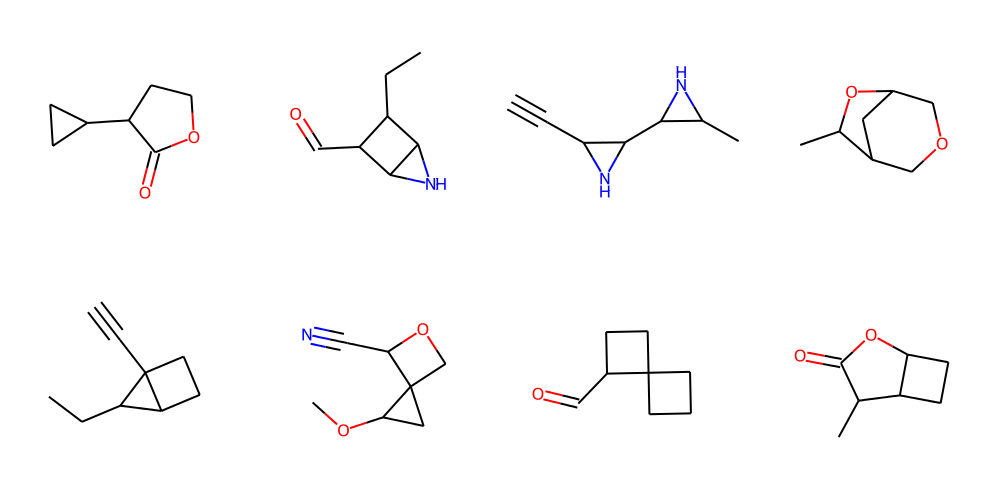

In [138]:
# After training
# generate Smiles molecules
smiles_list = gan_mol.generate_n(8)

# convert with rdkit
mol_list = [Chem.MolFromSmiles(m) for m in smiles_list]

# draw
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(250, 250), maxMols=10)